# **Installing Libraries**

In [1]:
!pip install pillow==10.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [1]:
%pip install --upgrade --quiet  langchain-google-genai pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 1.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [15]:
!pip install -U --quiet langchain-google-genai  langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.2/974.2 kB 4.7 MB/s eta 0:00:00


# **Passing Google API Key**

In [1]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

Provide your Google API Key··········


# **Generating ballad about LangChain**

In [2]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import JsonOutputParser

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature= 0.5)
result = llm.invoke("Write a ballad about LangChain")
print(result.content)

In realms of code, where knowledge flows,
A tale unfolds, a ballad of woes.
LangChain, a tool, both mighty and grand,
Yet fraught with trials, a treacherous strand.

With eager hearts, we sought its embrace,
To weave our thoughts, with elegance and grace.
But as we ventured, shadows did loom,
Unveiling secrets, dispelling the bloom.

Its interface, a labyrinthine maze,
Confounding minds, with its cryptic haze.
Syntaxes twisted, like serpents' coils,
Ensnaring thoughts, in endless toils.

We toiled and struggled, night and day,
Seeking answers, to light our way.
But LangChain's secrets, tightly held,
Left us bewildered, our spirits quelled.

Its documentation, a meager guide,
Offered scant solace, our hopes defied.
We sought assistance, from far and wide,
Yet met with silence, or disdainful pride.

Some cursed its name, with bitter tongue,
Declaring it a curse, a blight unsung.
Others persisted, with unwavering might,
Determined to conquer, despite the night.

Through sleepless nights, 

# **QA with LangChain**

In [21]:
from langchain_core.messages import HumanMessage, SystemMessage

model = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.5 ,convert_system_message_to_human=True)
model(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is apple a fruit?"),
    ]
)

/usr/local/lib/python3.10/dist-packages/langchain_google_genai/chat_models.py:345: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='Yes', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-eec4e1d8-50dc-4971-be27-df05b010bc95-0', usage_metadata={'input_tokens': 12, 'output_tokens': 1, 'total_tokens': 13})

# **Streaming & Batching**

In [6]:
for chunk in llm.stream("Write a limerick about LLMs."):
    print(chunk.content)
    print("---")
# Note that each chunk may contain more than one "token"

There once was a model, quite grand,
An LLM, a text
---
-making hand.
It could write a limerick,
Or a sonnet quite quick,
And generate tales at your command.
---


In [7]:
results = llm.batch(
    [
        "What's 2+2?",
        "What's 3+5?",
    ]
)
for res in results:
    print(res.content)

2+2=4
8


# **Multimodal Support**

## **Describing Image with LangChain**

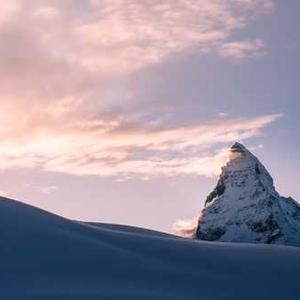

In [3]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [17]:
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example

file_path = "/content/img.jpg"
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)

response = llm.invoke([message])

print(response.content)

 A snow-capped mountain peak at sunset.


## **Converting Invoice to Json Using LangChain**

In [5]:
file_path = "/content/invoice.jpg"

#create the humanmassage propmt templete with the image file
hmessage = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Convert Invoice data into json format with appropriate json tags as required for the data in image ",
        },
        {"type": "image_url", "image_url": file_path},
    ]
)

message = llm.invoke([hmessage])

print(message.content)

 ```json
{
  "Invoice No": "20230325",
  "Invoice Date": "Mar 25, 2023",
  "Bill To": {
    "Elite for All LLC": {
      "Address": "7901 4TH ST. N STE 18389, ST. PETERSBURG, FL 33702, United States",
      "Email": "misbah.umay.urwah@gmail.com",
      "Phone": "+17274569232"
    }
  },
  "Ship To": {
    "Elite for All LLC": {
      "Address": "7 Clifford Street Lynbrook, NY 11563, USA",
      "Email": "misbah.umay.urwah@gmail.com",
      "Phone": "+17274569232"
    }
  },
  "Items": [
    {
      "Product": "Alastin HydraTint Pro Mineral Broad Spectrum Sunscreen SPF 36",
      "Quantity": 438,
      "UnitPrice": 26.5,
      "SubTotal": 11607.0
    }
  ],
  "SubTotal": 11607.0,
  "Tax": 580.35,
  "Invoice Total": 12187.35,
  "Payment Received": "Thanks E. & O.E."
}
```


In [6]:
from langchain_core.output_parsers import JsonOutputParser

In [7]:
parser = JsonOutputParser()


chain =  llm | parser

bill_json = chain.invoke([hmessage])

print(type(bill_json))
print(bill_json)

<class 'dict'>
{'Invoice No': '20230325', 'Invoice Date': 'Mar 25, 2023', 'Invoice To': {'Elite for All LLC': {'Address': '7901 4TH ST. N, STE 18389, ST. PETERSBURG, FL 33702, United States', 'Email': 'misbah.umay.urwah@gmail.com', 'Phone': '+17274569232'}}, 'Ship To': {'Elite for All LLC': {'Address': '7 Clifford Street Lynbrook, NY 11563, USA', 'Email': 'misbah.umay.urwah@gmail.com', 'Phone': '+17274569232'}}, 'Product Image': 'https://www.e-cosmetics.com/pub/media/catalog/product/cache/740x555/e/c/ec006_alastin_hydratint_pro_mineral_spf_36_1.jpg', 'Product Name': 'Alastin HydraTint Pro Mineral Broad Spectrum Sunscreen SPF 36', 'Quantity': 438, 'Unit Price': 26.5, 'Sub Total': 11607.0, 'Tax': 580.35, 'Invoice Total': 12187.35, 'Payment Received': 'Thanks E. & O.E.'}


## **Extracting Image Label using LangChain**

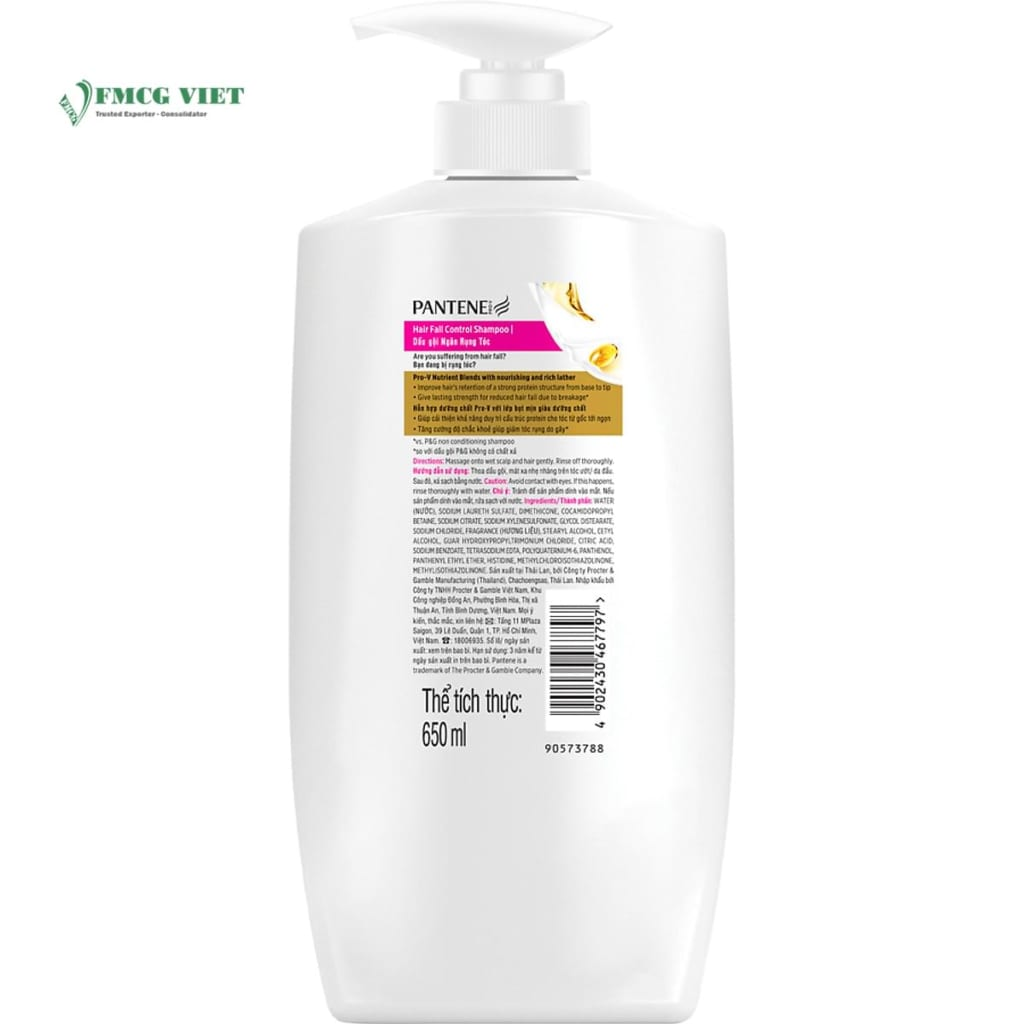

In [18]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/s1.jpg'

image = Image.open(file_path)

# Show the image
display(image)

In [20]:
product_msg = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Create a json with following tags extracted from image and use information only from image for value of each tag - 'product_name','manufactured_date','expiry_date','manufactured_by','marketed_by','ingredients'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
prod_output = llm.invoke([product_msg])

print(prod_output.content)

 ```json
{
  "product_name": "Pantene Pro-V Hair Fall Control Shampoo",
  "manufactured_date": "Not available",
  "expiry_date": "Not available",
  "manufactured_by": "Procter & Gamble",
  "marketed_by": "Not available",
  "ingredients": [
    "Water",
    "Sodium Laureth Sulfate",
    "Sodium Chloride",
    "Cocamidopropyl Betaine",
    "Glycol Distearate",
    "Cocamide MEA",
    "Dimethicone",
    "Fragrance",
    "Carbomer",
    "Sodium Benzoate",
    "Guar Hydroxypropyltrimonium Chloride",
    "Tetrasodium EDTA",
    "Citric Acid",
    "Methylchloroisothiazolinone",
    "Methylisothiazolinone",
    "CI 61565",
    "CI 19140"
  ]
}
```


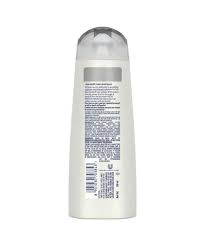

In [22]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/s3.jfif'

image = Image.open(file_path)

# Show the image
display(image)

In [23]:
product_msg = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Create a json with following tags extracted from image and use information only from image for value of each tag - 'product_name','manufactured_date','expiry_date','manufactured_by','marketed_by','ingredients'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
prod_output = llm.invoke([product_msg])

print(prod_output.content)

 ```json
{
  "product_name": "Dove Intense Repair Shampoo",
  "manufactured_date": "25-05-2021",
  "expiry_date": "24-05-2024",
  "manufactured_by": "Unilever",
  "marketed_by": "Unilever",
  "ingredients": "Aqua, Sodium Laureth Sulfate, Glycerin, Cocamidopropyl Betaine, Glycol Distearate, Parfum, Dimethiconol, Guar Hydroxypropyltrimonium Chloride, Sodium Chloride, Mica, Titanium Dioxide, Citric Acid, Sodium Benzoate, Polyquaternium-10, Tetrasodium EDTA, Methylchloroisothiazolinone, Methylisothiazolinone."
}
```


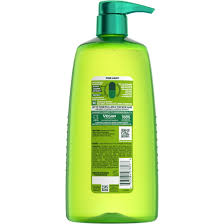

In [26]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/s2.jfif'

image = Image.open(file_path)

# Show the image
display(image)

In [27]:
product_msg = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Create a json with following tags extracted from image and use information only from image for value of each tag - 'product_name','manufactured_date','expiry_date','manufactured_by','marketed_by','ingredients'",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
prod_output = llm.invoke([product_msg])

print(prod_output.content)

 ```json
{
  "product_name": "Herbal Essences bio:renew Argan Oil of Morocco Shampoo",
  "manufactured_date": "2022-04-24",
  "expiry_date": "2025-04-24",
  "manufactured_by": "The Procter & Gamble Company",
  "marketed_by": "The Procter & Gamble Company",
  "ingredients": "Water, Sodium Laureth Sulfate, Cocamidopropyl Betaine, Glycerin, Sodium Chloride, Argania Spinosa Kernel Oil, Aloe Barbadensis Leaf Juice, Camellia Sinensis Leaf Extract, Citrus Aurantium Dulcis (Orange) Peel Oil, Eucalyptus Globulus Leaf Oil, Lavandula Angustifolia (Lavender) Oil, Mentha Piperita (Peppermint) Oil, Rosmarinus Officinalis (Rosemary) Leaf Oil, Fragrance, DMDM Hydantoin, Tetrasodium EDTA, Polyquaternium-10, Methylchloroisothiazolinone, Methylisothiazolinone, Butylphenyl Methylpropional, Limonene, Linalool"
}
```


## **Questioning about image**

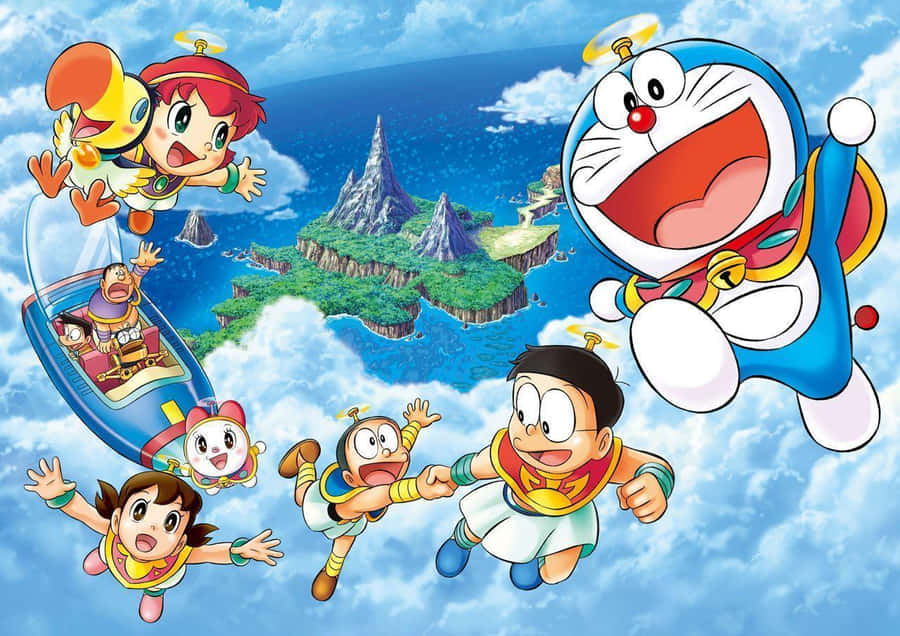

In [8]:
from PIL import Image
from IPython.display import display
# Specify the file path
file_path = '/content/doraemon-pictures.jpg'

image = Image.open(file_path)

# Show the image
display(image)

In [9]:
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Who is this Doraemon?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": file_path},
    ]
)
message_output = llm.invoke([message])

print(message_output.content)

 Doraemon is a Japanese manga series written and illustrated by Fujiko F. Fujio. The series follows the adventures of a robotic cat named Doraemon who travels back in time from the 22nd century to help a young boy named Nobita Nobi. Doraemon is a popular character in Japan and has been adapted into several anime television series, films, and video games.


In [10]:
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Doraemon?'}, {'type': 'image_url', 'image_url': '/content/doraemon-pictures.jpg'}])

In [11]:
# we can add text into content
# we will add the message into the 2nd last position
message.content.insert(-1,  {
            "type": "text",
            "text": f"{message_output.content}",
        })

In [12]:
#
new_query = "Describe nobita character?"

message.content.insert(-1,  {
            "type": "text",
            "text": f"{new_query}",
        })


In [13]:
message

HumanMessage(content=[{'type': 'text', 'text': 'Who is this Doraemon?'}, {'type': 'text', 'text': ' Doraemon is a Japanese manga series written and illustrated by Fujiko F. Fujio. The series follows the adventures of a robotic cat named Doraemon who travels back in time from the 22nd century to help a young boy named Nobita Nobi. Doraemon is a popular character in Japan and has been adapted into several anime television series, films, and video games.'}, {'type': 'text', 'text': 'Describe nobita character?'}, {'type': 'image_url', 'image_url': '/content/doraemon-pictures.jpg'}])

In [14]:
message_output = llm.invoke([message])

print(message_output.content)

 Nobita Nobi is the main character of the Doraemon franchise. He is a young boy who is often lazy and does not do well in school. However, he is also kind and caring, and he always tries to help others. Nobita is often helped by Doraemon, a robotic cat who travels back in time to help him.
